In [1]:
import pandas as pd

anime = pd.read_csv('animedb/data/anime.csv')
anime = anime.drop(columns=[f'Score-{i}' for i in range(1, 11)])
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394


In [2]:
# extract and filter genres
genres = set()

for genres_lst in anime['Genres'].values:
    for g in genres_lst.split(', '):
        genres.add(g)

genres = [
    'Psychological',
    'Action',
    'Shounen',
    'Supernatural',
    # 'Dementia',
    'Sports',
    'Martial Arts',
    'Historical',
    'Demons',
    'Josei',
    'Space',
    # 'Harem',
    # 'Kids',
    # 'Ecchi',
    'Mystery',
    'Vampire',
    # 'Shounen Ai',
    # 'Yuri',
    'Cars',
    'Super Power',
    'Seinen',
    'Sci-Fi',
    'Magic',
    'Parody',
    'Thriller',
    'Music',
    'Game',
    'Fantasy',
    'Adventure',
    'Romance',
    'Police',
    'Drama',
    # 'Hentai',
    'Samurai',
    'School',
    'Comedy',
    'Shoujo',
    # 'Yaoi',
    'Military',
    'Horror',
    'Slice of Life',
    # 'Shoujo Ai',
    'Mecha'
]

filtered_genres = ['Dementia', 'Harem', 'Kids', 'Ecchi', 'Shounen Ai', 'Yuri', 'Hentai', 'Yaoi', 'Shoujo Ai']
def genre_filter(genre_lst: str) -> bool:
    for g in genre_lst.split(', '):
        if g in filtered_genres:
            return False
    return True

anime = anime.loc[anime['Genres'].apply(genre_filter)]

In [3]:
# select well-known titles

titles = (
    'Fullmetal Alchemist:Brotherhood',
    'Attack on Titan',
    'Jujutsu Kaisen',
    
    'Bleach',
    'Naruto',
    'One Piece',
    
    'Haikyu!!',
    'Kuroko\'s Basketball',
    'Run with the Wind',

    'Violet Evergarden',
    'Your Lie in April',
    'Fruits Basket',
    
    'Made in Abyss',
    'Steins;Gate',
    'The Promised Neverland',
    
    'Gintama',
    'Great Teacher Onizuka',
    'Nichijou - My Ordinary Life',
)

featured = anime[anime['English name'].isin(titles)]
featured = featured.loc[featured['English name'].apply(lambda s: titles.index(s)).sort_values().index]
featured

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456,323463
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,R - 17+ (violence & profanity),115.0,2,2531397,129844,140753,2182587,37345,44635,126077
15119,38777,Jujutsu Kaisen,6.95,Shounen,Jujutsu Kaisen,呪術廻戦,ONA,3,"Dec 3, 2018 to Dec 8, 2018",Unknown,...,G - All Ages,3807.0,4283,14024,404,2681,2654,233,374,8082
245,269,Bleach,7.8,"Action, Adventure, Comedy, Super Power, Supern...",Bleach,BLEACH - ブリーチ -,TV,366,"Oct 5, 2004 to Mar 27, 2012",Fall 2004,...,PG-13 - Teens 13 or older,818.0,33,1286382,54386,207985,638922,130961,174710,133804
10,20,Naruto,7.91,"Action, Adventure, Comedy, Super Power, Martia...",Naruto,ナルト,TV,220,"Oct 3, 2002 to Feb 8, 2007",Fall 2002,...,PG-13 - Teens 13 or older,660.0,8,1830540,65586,137167,1462223,61734,99806,69610
11,21,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",One Piece,ONE PIECE,TV,Unknown,"Oct 20, 1999 to ?",Fall 1999,...,PG-13 - Teens 13 or older,95.0,31,1352724,126645,887333,33,187919,136245,141194
8305,20583,Haikyuu!!,8.53,"Comedy, Sports, Drama, School, Shounen",Haikyu!!,ハイキュー!!,TV,25,"Apr 6, 2014 to Sep 21, 2014",Spring 2014,...,PG-13 - Teens 13 or older,91.0,50,1185274,54887,83029,896822,31311,21054,153058
6620,11771,Kuroko no Basket,8.15,"Comedy, School, Shounen, Sports",Kuroko's Basketball,黒子のバスケ,TV,25,"Apr 8, 2012 to Sep 22, 2012",Spring 2012,...,PG-13 - Teens 13 or older,367.0,104,810207,18955,44424,609160,23011,21160,112452
14600,37965,Kaze ga Tsuyoku Fuiteiru,8.45,"Comedy, Sports, Drama",Run with the Wind,風が強く吹いている,TV,23,"Oct 3, 2018 to Mar 27, 2019",Fall 2018,...,PG-13 - Teens 13 or older,122.0,762,196221,4163,20339,102342,7689,6061,59790
11857,33352,Violet Evergarden,8.64,"Slice of Life, Drama, Fantasy",Violet Evergarden,ヴァイオレット・エヴァーガーデン,TV,13,"Jan 11, 2018 to Apr 5, 2018",Winter 2018,...,PG-13 - Teens 13 or older,57.0,67,1039300,34340,92325,615251,36485,33681,261558


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def matrix_builder(frame: pd.DataFrame, metric):
    n = len(frame)
    XY = np.zeros((n, n))
    for row in range(n):
        for col in range(n):
            row1 = frame.iloc[row]
            row2 = frame.iloc[col]
            XY[row, col] = metric(row1, row2)
    return XY

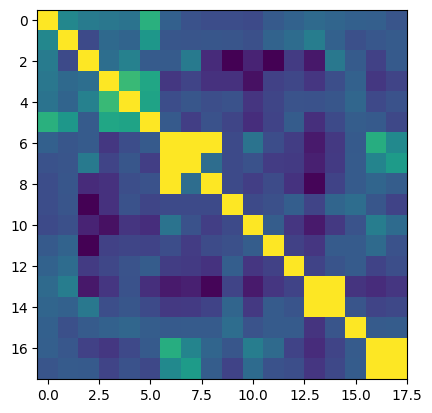

In [5]:
import datetime
import treegenerator

genre_trees = [
    {'Slice of Life': [{'School': []}, {'Parody': []}, {'Music': []}, {'Comedy': []}, {'Drama': []}]},
    {'Sci-Fi': [{'Mecha': []}, {'Space': []}]}, {'Shoujo': [{'Romance': []}, {'Josei': []}]},
    {'Shounen': [{'Adventure': []}, {'Game': []}, {'Sports': [{'Cars': []}]},
                 {'Action': [{'Martial Arts': []}, {'Historical': [{'Samurai': []}]}, {'Police': [{'Military': []}]}]}]},
    {'Mystery': [{'Thriller': [{'Horror': []}]}, {'Fantasy': [{'Magic': []}]}, {'Supernatural': [{'Super Power': []}, {'Demons': []}, {'Vampire': []}]}]},
]

def genres_similarity(gs1, gs2):
    def get_path(g: str, tree = genre_trees):
        for node in tree:
            if g in node:
                return [g]
            p = get_path(g, list(node.values())[0])
            if len(p) > 0:
                return list(node.keys()) + p
        return []
    def shrink_genres(gs):
        genre_includes = lambda g1, g2: '/'.join(get_path(g1)) in '/'.join(get_path(g2))
        return [gs[i] for i in range(len(gs)) if not any(i != j and genre_includes(gs[i], gs[j]) for j in range(len(gs)))]
    def genre_dist(g1: str, g2: str):
        """Finds distance in genre tree in minimal number of steps needed to reach g1 from g2 (or g2 from g1)"""        
        p1, p2 = get_path(g1), get_path(g2)
        p1, p2 = set(p1), set(p2)
        return len(p1.symmetric_difference(p2))
    def Jaccard_similarity(gs1, gs2):
        gs1, gs2 = set(gs1), set(gs2)
        return len(gs1.intersection(gs2)) / (len(gs1.union(gs2)))
    gs1 = shrink_genres(gs1)
    gs2 = shrink_genres(gs2)
    d1to2 = [min(genre_dist(g1, g2) for g2 in gs2) for g1 in gs1]
    d2to1 = [min(genre_dist(g2, g1) for g1 in gs1) for g2 in gs2]
    sim = (sum(d1to2) + sum(d2to1)) / 2
    return Jaccard_similarity(gs1, gs2) + 1 / (1 + 0.1 * sim)

# compare by genres
def simple_metric1(row1: pd.DataFrame, row2: pd.DataFrame):
    genres1 = row1['Genres'].split(', ')
    genres2 = row2['Genres'].split(', ')
    return genres_similarity(genres1, genres2)


__genr_tree = treegenerator.load_best_genres_tree()
def simple_metric1_2(row1: pd.DataFrame, row2: pd.DataFrame):
    genres1 = row1['Genres'].split(', ')
    genres2 = row2['Genres'].split(', ')
    return treegenerator.compute_similarity(__genr_tree, genres1, genres2)
    

genres_mat = matrix_builder(featured, simple_metric1_2)
plt.imshow(genres_mat, interpolation='nearest')
plt.show()

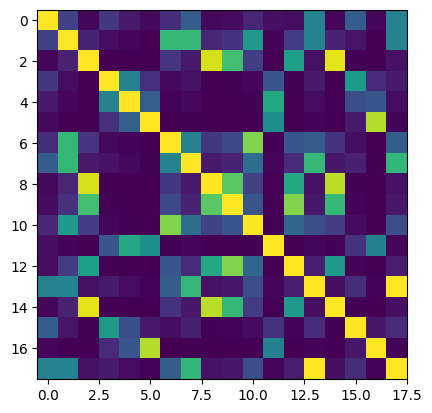

In [6]:
# compare by aired dates
def simple_metric2(row1: pd.DataFrame, row2: pd.DataFrame):
    def parse_datetime(st: str):
        if st != '?':
            return datetime.datetime.strptime(st, "%b %d, %Y")
        return datetime.datetime.now()
    aired1 = list(map(parse_datetime, row1['Aired'].split(' to ')))
    aired2 = list(map(parse_datetime, row2['Aired'].split(' to ')))
    t = abs(aired1[0] - aired2[0]).days
    return np.exp(-t / 900)

aired_mat = matrix_builder(featured, simple_metric2)
plt.imshow(aired_mat, interpolation='nearest')
plt.show()

In [33]:
# compare by aired dates (simple neural network) (train model)
# import tensorflow as tf

def extract_dates(aired: str) -> (int, int, int, int, int, int):
    def parse_datetime(st: str):
        if st != '?':
            return datetime.datetime.strptime(st, "%b %d, %Y")
        return datetime.datetime.now()
    aired = list(map(parse_datetime, aired.split(' to ')))
    return aired[0].year, aired[0].month, aired[0].day, aired[1].year, aired[1].month, aired[1].day

def dates_to_array(str1: str, str2: str):
    dates1 = extract_dates(str1)
    dates2 = extract_dates(str2)
    stacked = np.stack([dates1, dates2], axis=0)
    return np.reshape(stacked, (12,))

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(12, activation='sigmoid'),
#     tf.keras.layers.Dense(60, activation='sigmoid'),
#     tf.keras.layers.Dense(4, activation='sigmoid'),
#     tf.keras.layers.Dense(1, activation='relu'),
#     tf.keras.layers.Softmax(),
# ])

# model.compile(loss=tf.keras.losses.MeanSquaredError())

aired_dates = featured['Aired'].array

# create 2d matrix of dates
aired_pairs = []
for i in range(18):
    for j in range(18):
        str1 = aired_dates[i]
        str2 = aired_dates[j]
        dates_arr = dates_to_array(str1, str2)
        aired_pairs.append(dates_arr)
aired_pairs = np.array(aired_pairs, dtype=np.float64)

expect_output = np.array([
    1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
], dtype=np.float64)

# X_train, y_train = aired_pairs, expect_output

# hist = model.fit(X_train, y_train, epochs=10)
# print(hist.history)

# model.summary()

In [34]:
# encode anime row into numeric values
def encode_anime(anime_row: pd.DataFrame):
    def extract_dates(aired: str) -> (int, int, int, int, int, int):
        def parse_datetime(st: str):
            if st != '?':
                return datetime.datetime.strptime(st, "%b %d, %Y")
            return datetime.datetime.now()
        aired = list(map(parse_datetime, aired.split(' to ')))
        return aired[0].year, aired[0].month, aired[0].day, aired[1].year, aired[1].month, aired[1].day
    dates = extract_dates(anime_row['Aired'])
    anim_grs = [(1 if g in anime_row['Genres'] else 0) for g in genres]
    episodes = [int(anime_row['Episodes']) if anime_row['Episodes'] != 'Unknown' else 0]
    duration = [int(anime_row['Duration'].split()[0])]
    
    enc = np.array([*anim_grs, *dates, *episodes, *duration])
    enc.reshape((-1,))
    return enc

encoded_featured = []
for i, f in featured[['Genres', 'Aired', 'Episodes', 'Duration']].iterrows():
    encoded_featured.append(encode_anime(f))
encoded_featured = np.stack(encoded_featured)

In [35]:
# def simple_metric2_nn(row1: pd.DataFrame, row2: pd.DataFrame):
#     dates_arr1 = dates_to_array(row1['Aired'], row2['Aired'])
#     dates_arr2 = dates_to_array(row2['Aired'], row1['Aired'])
#     res1 = model(tf.stack([dates_arr1]))
#     res2 = model(tf.stack([dates_arr2]))
#     res1 = res1[0][0].numpy()
#     res2 = res2[0][0].numpy()
#     return (res1 + res2) / 2
# 
# 
# aired_mat = matrix_builder(featured, simple_metric2_nn)
# print(aired_mat)
# plt.imshow(aired_mat, interpolation='nearest')
# plt.show()

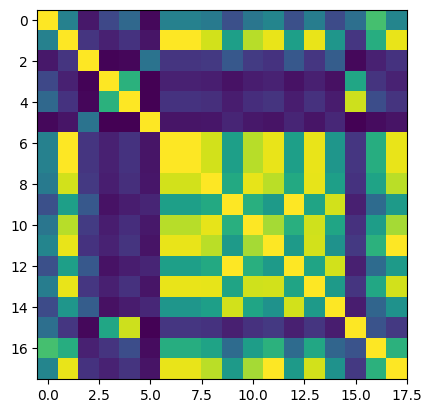

In [7]:
# compare by duration
def simple_metric3(row1: pd.DataFrame, row2: pd.DataFrame):
    dur1 = int(row1['Episodes']) if row1['Episodes'] != 'Unknown' else 1
    dur2 = int(row2['Episodes']) if row2['Episodes'] != 'Unknown' else 1
    dur1 = np.log10(dur1)
    dur2 = np.log10(dur2)
    t = abs(dur1 - dur2)
    return np.exp(-2 * t)

studio_mat = matrix_builder(featured, simple_metric3)
plt.imshow(studio_mat, interpolation='nearest')
plt.show()

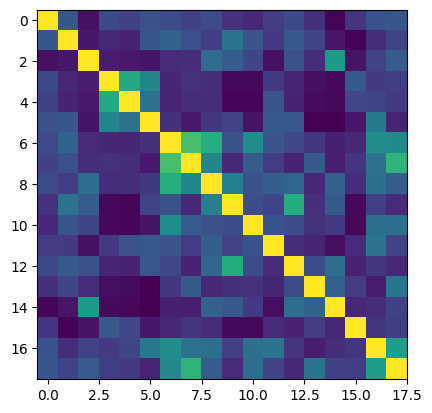

In [12]:
# combined metric
def combined_metric(row1: pd.DataFrame, row2: pd.DataFrame, w1, w2, w3):
    m1 = simple_metric1(row1, row2)
    m2 = simple_metric2(row1, row2)
    m3 = simple_metric3(row1, row2)
    return (w1 * m1 + w2 * m2 + w3 * m3) / (w1 + w2 + w3)

def mse_learner() -> (float, float, float):
    w1, w2, w3 = 0.0918, 1.621, 0.17
    expect_output = np.array([
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
    ], dtype=np.float64)
    expect_output = expect_output.reshape((18, 18))
    mat = matrix_builder(featured, lambda row1, row2: combined_metric(row1, row2, w1, w2, w3))
    mse = np.square(mat - expect_output).sum()
    
    def dmse(dw1, dw2, dw3):
        mat1 = matrix_builder(featured, lambda row1, row2: combined_metric(row1, row2, w1, w2, w3))
        mat2 = matrix_builder(featured, lambda row1, row2: combined_metric(row1, row2, w1 + dw1, w2 + dw2, w3 + dw3))
        mse1 = np.square(mat1 - expect_output).sum()
        mse2 = np.square(mat2 - expect_output).sum()
        return mse2 - mse1
        
    dw1, dw2, dw3 = 1e-1, 1e-1, 1e-1
    for i in range(100):
        dmse1 = dmse(dw1, 0, 0)
        dmse2 = dmse(0, dw2, 0)
        dmse3 = dmse(0, 0, dw3)
        w1 -= 3 * dmse1 * dw1
        w2 -= 3 * dmse2 * dw2
        w3 -= 3 * dmse3 * dw3
        
        mat = matrix_builder(featured, lambda row1, row2: combined_metric(row1, row2, w1, w2, w3))
        mse = np.square(mat - expect_output).sum()
        print('mse:', mse, 'weights:', w1, w2, w3)
    
    return w1, w2, w3

# w1, w2, w3 = mse_learner()
w1, w2, w3 = 0.928, 0.5692, 0.1679

combined_mat = matrix_builder(featured, lambda row1, row2: combined_metric(row1, row2, w1, w2, w3))
plt.imshow(combined_mat, interpolation='nearest')
plt.show()